# Written Exercise 5.

Another assumption we made in the homework is that the data used for training shadow models
is independent of the data used to train the attacked model f (x). Investigate attack success as a function
of the intersection between shadow data and training data. Your should include a graphic that presents a
measure of shared data on one axis and the resulting attacker success on the other. Investigate at least 3
levels of overlap outside of no overlap.

The following steps will be taken:

1. Build a function that takes in shadow data, training data and the overlap proportion and returns training and shadow data with a certain amount of overlap.

2. Loop through different overlap values [0, 0.5, 0.9, 1] and train models at 30 epochs, batch size 2048.

3. Make plots of attack success rate vs. overlap level.

In [1]:
import hw5_part1_utils

from typing import Tuple
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
import numpy as np
from copy import copy

from tqdm import tqdm

from hw5_part1 import synthesize_attack_data, build_attack_models, evaluate_membership

data = hw5_part1_utils.CIFARData()


### Step 1. Build Function that overlaps training and shadow data

Because shadow data has 20k samples, and train data has 10k samples, I will simply take 10k samples from shadow data to train the shadow model so that there is controlled overlap.

In [2]:
def overlap_datasets(train_data, train_label, shadow_data, shadow_label, proportion):
    """
    Returns 2 datasets, one for training and other for shadow training 
    with proportion overlap between the two.
    """
    
    data_length = min([train_data.shape[0], shadow_data.shape[0]])
    num_shared = int(np.floor(data_length*proportion))
    
    shared_data = shadow_data[data_length:data_length + num_shared]
    shared_data_labels = shadow_label[data_length:data_length+num_shared]
    
    new_train_data = np.append(train_data[0:data_length-num_shared], shared_data, axis=0)
    new_train_label = np.append(train_label[0:data_length-num_shared], shared_data_labels, axis=0)
    
    new_shadow_data = np.append(shadow_data[0:data_length-num_shared], shared_data, axis=0)
    new_shadow_label = np.append(shadow_label[0:data_length-num_shared], shared_data_labels, axis=0)
    
    return new_train_data, new_train_label, new_shadow_data, new_shadow_label


### Step 2. Loop through different proportions to train model, shadow model

In [3]:
# Settings
proportions = [0, 0.5, 0.9, 0.95]
ep = 30

# List to hold models
models = []
shadow_models = []
train_data = []
train_label = []
shadow_data = []
shadow_label = []

for i in range(len(proportions)):
    train_data1, train_label1, shadow_data1, shadow_label1 = overlap_datasets(data.train,
                                                                         data.labels_train,
                                                                         data.shadow,
                                                                         data.labels_shadow,
                                                                         proportions[i])
    
    train_data += [train_data1]
    train_label += [train_label1]
    shadow_data += [shadow_data1]
    shadow_label += [shadow_label1]
    
    models += [hw5_part1_utils.CIFARModel(epochs = ep, batch_size = 2048)]
    models[i].init(train_data[i], train_label[i])
    
    shadow_models += [build_attack_models(
                        models[i],
                        shadow_data[i],
                        shadow_label[i]
                    )]
    


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.

attack model no. 0
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 3936 samples
Epoch 1/30
3936/3936 [==============================] - 0s 90us/sample - loss: 0.6921 - acc: 0.5112
Epoch 2/30
3936/3936 [==============================] - 0s 8us/sample - loss: 0.6861 - acc: 0.5518
Epoch 3/30
3936/3936 [==============================] - 0s 5us/sample - loss: 0.6790 - acc: 0.5838
Epoch 4/30
3936/3936 [==============================] - 0s 9us/sample - loss: 0.6733 - acc: 0.6070
Epoch 5/30
3936/3936 [==============================] - 0s 7us/sample - loss: 0.6663 - acc: 0.6179
Epoch 6/30
3936/3936 [=============================

4040/4040 [==============================] - 0s 8us/sample - loss: 0.6605 - acc: 0.6319
Epoch 6/30
4040/4040 [==============================] - 0s 6us/sample - loss: 0.6506 - acc: 0.6554
Epoch 7/30
4040/4040 [==============================] - 0s 6us/sample - loss: 0.6431 - acc: 0.6562
Epoch 8/30
4040/4040 [==============================] - 0s 7us/sample - loss: 0.6367 - acc: 0.6671
Epoch 9/30
4040/4040 [==============================] - 0s 8us/sample - loss: 0.6325 - acc: 0.6653
Epoch 10/30
4040/4040 [==============================] - 0s 7us/sample - loss: 0.6251 - acc: 0.6634
Epoch 11/30
4040/4040 [==============================] - 0s 6us/sample - loss: 0.6183 - acc: 0.6713
Epoch 12/30
4040/4040 [==============================] - 0s 7us/sample - loss: 0.6195 - acc: 0.6631
Epoch 13/30
4040/4040 [==============================] - 0s 8us/sample - loss: 0.6163 - acc: 0.6676
Epoch 14/30
4040/4040 [==============================] - 0s 7us/sample - loss: 0.6136 - acc: 0.6748
Epoch 15/30
4040

4040/4040 [==============================] - 0s 8us/sample - loss: 0.6134 - acc: 0.6606
Epoch 27/30
4040/4040 [==============================] - 0s 6us/sample - loss: 0.6084 - acc: 0.6696
Epoch 28/30
4040/4040 [==============================] - 0s 6us/sample - loss: 0.6089 - acc: 0.6550
Epoch 29/30
4040/4040 [==============================] - 0s 6us/sample - loss: 0.6120 - acc: 0.6683
Epoch 30/30
4040/4040 [==============================] - 0s 6us/sample - loss: 0.6023 - acc: 0.6817
attack model no. 5
Train on 3952 samples
Epoch 1/30
3952/3952 [==============================] - 0s 126us/sample - loss: 0.6846 - acc: 0.5691
Epoch 2/30
3952/3952 [==============================] - 0s 5us/sample - loss: 0.6770 - acc: 0.6096
Epoch 3/30
3952/3952 [==============================] - 0s 6us/sample - loss: 0.6686 - acc: 0.6349
Epoch 4/30
3952/3952 [==============================] - 0s 7us/sample - loss: 0.6600 - acc: 0.6531
Epoch 5/30
3952/3952 [==============================] - 0s 6us/sample - l

4104/4104 [==============================] - 0s 7us/sample - loss: 0.6024 - acc: 0.6718
Epoch 17/30
4104/4104 [==============================] - 0s 6us/sample - loss: 0.5967 - acc: 0.6796
Epoch 18/30
4104/4104 [==============================] - 0s 7us/sample - loss: 0.5943 - acc: 0.6762
Epoch 19/30
4104/4104 [==============================] - 0s 7us/sample - loss: 0.5936 - acc: 0.6869
Epoch 20/30
4104/4104 [==============================] - 0s 6us/sample - loss: 0.5878 - acc: 0.6827
Epoch 21/30
4104/4104 [==============================] - 0s 6us/sample - loss: 0.5925 - acc: 0.6813
Epoch 22/30
4104/4104 [==============================] - 0s 6us/sample - loss: 0.5820 - acc: 0.6869
Epoch 23/30
4104/4104 [==============================] - 0s 6us/sample - loss: 0.5933 - acc: 0.6767
Epoch 24/30
4104/4104 [==============================] - 0s 7us/sample - loss: 0.5789 - acc: 0.6901
Epoch 25/30
4104/4104 [==============================] - 0s 7us/sample - loss: 0.5850 - acc: 0.6849
Epoch 26/30


Epoch 7/30
3996/3996 [==============================] - 0s 8us/sample - loss: 0.6628 - acc: 0.6236
Epoch 8/30
3996/3996 [==============================] - 0s 7us/sample - loss: 0.6553 - acc: 0.6329
Epoch 9/30
3996/3996 [==============================] - 0s 10us/sample - loss: 0.6589 - acc: 0.6219
Epoch 10/30
3996/3996 [==============================] - 0s 7us/sample - loss: 0.6526 - acc: 0.6346
Epoch 11/30
3996/3996 [==============================] - 0s 7us/sample - loss: 0.6513 - acc: 0.6231
Epoch 12/30
3996/3996 [==============================] - 0s 7us/sample - loss: 0.6529 - acc: 0.6284
Epoch 13/30
3996/3996 [==============================] - 0s 10us/sample - loss: 0.6515 - acc: 0.6286
Epoch 14/30
3996/3996 [==============================] - 0s 7us/sample - loss: 0.6456 - acc: 0.6366
Epoch 15/30
3996/3996 [==============================] - 0s 6us/sample - loss: 0.6456 - acc: 0.6359
Epoch 16/30
3996/3996 [==============================] - 0s 7us/sample - loss: 0.6424 - acc: 0.6401
E

3936/3936 [==============================] - 0s 9us/sample - loss: 0.5842 - acc: 0.6842
Epoch 29/30
3936/3936 [==============================] - 0s 7us/sample - loss: 0.5777 - acc: 0.6916
Epoch 30/30
3936/3936 [==============================] - 0s 7us/sample - loss: 0.5782 - acc: 0.6860
attack model no. 3
Train on 4020 samples
Epoch 1/30
4020/4020 [==============================] - 0s 118us/sample - loss: 0.6783 - acc: 0.5863
Epoch 2/30
4020/4020 [==============================] - 0s 7us/sample - loss: 0.6620 - acc: 0.6413
Epoch 3/30
4020/4020 [==============================] - 0s 6us/sample - loss: 0.6474 - acc: 0.6721
Epoch 4/30
4020/4020 [==============================] - 0s 7us/sample - loss: 0.6386 - acc: 0.6871
Epoch 5/30
4020/4020 [==============================] - 0s 7us/sample - loss: 0.6266 - acc: 0.6958
Epoch 6/30
4020/4020 [==============================] - 0s 7us/sample - loss: 0.6135 - acc: 0.7095
Epoch 7/30
4020/4020 [==============================] - 0s 8us/sample - los

3900/3900 [==============================] - 0s 7us/sample - loss: 0.5682 - acc: 0.7049
Epoch 20/30
3900/3900 [==============================] - 0s 7us/sample - loss: 0.5750 - acc: 0.6946
Epoch 21/30
3900/3900 [==============================] - 0s 7us/sample - loss: 0.5722 - acc: 0.7000
Epoch 22/30
3900/3900 [==============================] - 0s 6us/sample - loss: 0.5687 - acc: 0.7021
Epoch 23/30
3900/3900 [==============================] - 0s 7us/sample - loss: 0.5612 - acc: 0.7105
Epoch 24/30
3900/3900 [==============================] - 0s 7us/sample - loss: 0.5727 - acc: 0.7026
Epoch 25/30
3900/3900 [==============================] - 0s 7us/sample - loss: 0.5663 - acc: 0.6995
Epoch 26/30
3900/3900 [==============================] - 0s 7us/sample - loss: 0.5589 - acc: 0.7056
Epoch 27/30
3900/3900 [==============================] - 0s 6us/sample - loss: 0.5672 - acc: 0.7074
Epoch 28/30
3900/3900 [==============================] - 0s 7us/sample - loss: 0.5641 - acc: 0.7074
Epoch 29/30


3968/3968 [==============================] - 0s 7us/sample - loss: 0.6495 - acc: 0.6316
Epoch 11/30
3968/3968 [==============================] - 0s 7us/sample - loss: 0.6498 - acc: 0.6273
Epoch 12/30
3968/3968 [==============================] - 0s 7us/sample - loss: 0.6513 - acc: 0.6250
Epoch 13/30
3968/3968 [==============================] - 0s 6us/sample - loss: 0.6464 - acc: 0.6308
Epoch 14/30
3968/3968 [==============================] - 0s 10us/sample - loss: 0.6456 - acc: 0.6283
Epoch 15/30
3968/3968 [==============================] - 0s 6us/sample - loss: 0.6420 - acc: 0.6265
Epoch 16/30
3968/3968 [==============================] - 0s 6us/sample - loss: 0.6395 - acc: 0.6348
Epoch 17/30
3968/3968 [==============================] - 0s 7us/sample - loss: 0.6422 - acc: 0.6225
Epoch 18/30
3968/3968 [==============================] - 0s 6us/sample - loss: 0.6377 - acc: 0.6265
Epoch 19/30
3968/3968 [==============================] - 0s 7us/sample - loss: 0.6400 - acc: 0.6255
Epoch 20/30

Epoch 1/30
4104/4104 [==============================] - 1s 140us/sample - loss: 0.6850 - acc: 0.5482
Epoch 2/30
4104/4104 [==============================] - 0s 8us/sample - loss: 0.6711 - acc: 0.6299
Epoch 3/30
4104/4104 [==============================] - 0s 8us/sample - loss: 0.6628 - acc: 0.6367
Epoch 4/30
4104/4104 [==============================] - 0s 8us/sample - loss: 0.6485 - acc: 0.6650
Epoch 5/30
4104/4104 [==============================] - 0s 8us/sample - loss: 0.6428 - acc: 0.6596
Epoch 6/30
4104/4104 [==============================] - 0s 8us/sample - loss: 0.6261 - acc: 0.6742
Epoch 7/30
4104/4104 [==============================] - 0s 7us/sample - loss: 0.6259 - acc: 0.6657
Epoch 8/30
4104/4104 [==============================] - 0s 8us/sample - loss: 0.6089 - acc: 0.6835
Epoch 9/30
4104/4104 [==============================] - 0s 8us/sample - loss: 0.6051 - acc: 0.6845
Epoch 10/30
4104/4104 [==============================] - 0s 8us/sample - loss: 0.6035 - acc: 0.6774
Epoch 1

4032/4032 [==============================] - 0s 8us/sample - loss: 0.5637 - acc: 0.7101
Epoch 23/30
4032/4032 [==============================] - 0s 8us/sample - loss: 0.5600 - acc: 0.7016
Epoch 24/30
4032/4032 [==============================] - 0s 8us/sample - loss: 0.5638 - acc: 0.7049
Epoch 25/30
4032/4032 [==============================] - 0s 8us/sample - loss: 0.5558 - acc: 0.7128
Epoch 26/30
4032/4032 [==============================] - 0s 8us/sample - loss: 0.5474 - acc: 0.7143
Epoch 27/30
4032/4032 [==============================] - 0s 9us/sample - loss: 0.5544 - acc: 0.7081
Epoch 28/30
4032/4032 [==============================] - 0s 13us/sample - loss: 0.5506 - acc: 0.7178
Epoch 29/30
4032/4032 [==============================] - 0s 8us/sample - loss: 0.5493 - acc: 0.7185
Epoch 30/30
4032/4032 [==============================] - 0s 8us/sample - loss: 0.5615 - acc: 0.6997
attack model no. 4
Train on 4020 samples
Epoch 1/30
4020/4020 [==============================] - 1s 147us/sampl

Epoch 13/30
3908/3908 [==============================] - 0s 8us/sample - loss: 0.6352 - acc: 0.6546
Epoch 14/30
3908/3908 [==============================] - 0s 8us/sample - loss: 0.6158 - acc: 0.6727
Epoch 15/30
3908/3908 [==============================] - 0s 7us/sample - loss: 0.6153 - acc: 0.6704
Epoch 16/30
3908/3908 [==============================] - 0s 8us/sample - loss: 0.6137 - acc: 0.6684
Epoch 17/30
3908/3908 [==============================] - 0s 8us/sample - loss: 0.6169 - acc: 0.6650
Epoch 18/30
3908/3908 [==============================] - 0s 8us/sample - loss: 0.6073 - acc: 0.6740
Epoch 19/30
3908/3908 [==============================] - 0s 7us/sample - loss: 0.6117 - acc: 0.6663
Epoch 20/30
3908/3908 [==============================] - 0s 9us/sample - loss: 0.6140 - acc: 0.6638
Epoch 21/30
3908/3908 [==============================] - 0s 8us/sample - loss: 0.6106 - acc: 0.6617
Epoch 22/30
3908/3908 [==============================] - 0s 7us/sample - loss: 0.6074 - acc: 0.6643


4056/4056 [==============================] - 0s 8us/sample - loss: 0.6758 - acc: 0.5449
Epoch 4/30
4056/4056 [==============================] - 0s 9us/sample - loss: 0.6601 - acc: 0.6196
Epoch 5/30
4056/4056 [==============================] - 0s 9us/sample - loss: 0.6476 - acc: 0.6640
Epoch 6/30
4056/4056 [==============================] - 0s 9us/sample - loss: 0.6385 - acc: 0.6677
Epoch 7/30
4056/4056 [==============================] - 0s 8us/sample - loss: 0.6233 - acc: 0.6935
Epoch 8/30
4056/4056 [==============================] - 0s 10us/sample - loss: 0.6130 - acc: 0.6933
Epoch 9/30
4056/4056 [==============================] - 0s 9us/sample - loss: 0.6055 - acc: 0.6869
Epoch 10/30
4056/4056 [==============================] - 0s 9us/sample - loss: 0.5875 - acc: 0.7083
Epoch 11/30
4056/4056 [==============================] - 0s 9us/sample - loss: 0.5868 - acc: 0.6916
Epoch 12/30
4056/4056 [==============================] - 0s 9us/sample - loss: 0.5786 - acc: 0.6990
Epoch 13/30
4056/

4144/4144 [==============================] - 0s 10us/sample - loss: 0.5771 - acc: 0.6918
Epoch 25/30
4144/4144 [==============================] - 0s 13us/sample - loss: 0.5769 - acc: 0.6832
Epoch 26/30
4144/4144 [==============================] - 0s 9us/sample - loss: 0.5690 - acc: 0.6981
Epoch 27/30
4144/4144 [==============================] - 0s 9us/sample - loss: 0.5702 - acc: 0.6938
Epoch 28/30
4144/4144 [==============================] - 0s 9us/sample - loss: 0.5647 - acc: 0.7029
Epoch 29/30
4144/4144 [==============================] - 0s 10us/sample - loss: 0.5651 - acc: 0.7027
Epoch 30/30
4144/4144 [==============================] - 0s 9us/sample - loss: 0.5714 - acc: 0.6916
attack model no. 2
Train on 3800 samples
Epoch 1/30
3800/3800 [==============================] - 1s 180us/sample - loss: 0.6945 - acc: 0.5045
Epoch 2/30
3800/3800 [==============================] - 0s 6us/sample - loss: 0.6788 - acc: 0.5611
Epoch 3/30
3800/3800 [==============================] - 0s 8us/sampl

4028/4028 [==============================] - 0s 8us/sample - loss: 0.6158 - acc: 0.6693
Epoch 15/30
4028/4028 [==============================] - 0s 10us/sample - loss: 0.6204 - acc: 0.6589
Epoch 16/30
4028/4028 [==============================] - 0s 13us/sample - loss: 0.6140 - acc: 0.6648
Epoch 17/30
4028/4028 [==============================] - 0s 8us/sample - loss: 0.6198 - acc: 0.6542
Epoch 18/30
4028/4028 [==============================] - 0s 9us/sample - loss: 0.6120 - acc: 0.6678
Epoch 19/30
4028/4028 [==============================] - 0s 9us/sample - loss: 0.6097 - acc: 0.6730
Epoch 20/30
4028/4028 [==============================] - 0s 10us/sample - loss: 0.6074 - acc: 0.6683
Epoch 21/30
4028/4028 [==============================] - 0s 9us/sample - loss: 0.6041 - acc: 0.6760
Epoch 22/30
4028/4028 [==============================] - 0s 10us/sample - loss: 0.6167 - acc: 0.6529
Epoch 23/30
4028/4028 [==============================] - 0s 9us/sample - loss: 0.6081 - acc: 0.6648
Epoch 24

4076/4076 [==============================] - 0s 10us/sample - loss: 0.6666 - acc: 0.6629
Epoch 5/30
4076/4076 [==============================] - 0s 9us/sample - loss: 0.6584 - acc: 0.6818
Epoch 6/30
4076/4076 [==============================] - 0s 9us/sample - loss: 0.6473 - acc: 0.6857
Epoch 7/30
4076/4076 [==============================] - 0s 10us/sample - loss: 0.6368 - acc: 0.6938
Epoch 8/30
4076/4076 [==============================] - 0s 11us/sample - loss: 0.6238 - acc: 0.6970
Epoch 9/30
4076/4076 [==============================] - 0s 8us/sample - loss: 0.6152 - acc: 0.6943
Epoch 10/30
4076/4076 [==============================] - 0s 10us/sample - loss: 0.5998 - acc: 0.7041
Epoch 11/30
4076/4076 [==============================] - 0s 8us/sample - loss: 0.5864 - acc: 0.7093
Epoch 12/30
4076/4076 [==============================] - 0s 10us/sample - loss: 0.5855 - acc: 0.6980
Epoch 13/30
4076/4076 [==============================] - 0s 10us/sample - loss: 0.5807 - acc: 0.7002
Epoch 14/30

4124/4124 [==============================] - 0s 9us/sample - loss: 0.5636 - acc: 0.6998
Epoch 26/30
4124/4124 [==============================] - 0s 10us/sample - loss: 0.5692 - acc: 0.6874
Epoch 27/30
4124/4124 [==============================] - 0s 9us/sample - loss: 0.5657 - acc: 0.6920
Epoch 28/30
4124/4124 [==============================] - 0s 9us/sample - loss: 0.5642 - acc: 0.6940
Epoch 29/30
4124/4124 [==============================] - 0s 9us/sample - loss: 0.5589 - acc: 0.7073
Epoch 30/30
4124/4124 [==============================] - 0s 9us/sample - loss: 0.5563 - acc: 0.7013


### Step 4. Evaluate Attack Success Rate

In [4]:
# Predict each of the labels
y_pred_ins = []
y_pred_outs= []

for i in range(len(proportions)):
    target_model = models[i]
    y_pred_in = target_model.predict(train_data[i])
    y_pred_out = target_model.predict(data.test)
    y_pred_ins += [y_pred_in]
    y_pred_outs += [y_pred_out]

In [5]:
# Evaluate membership of each using the Shadow Attack

model_in_preds = []
model_out_preds= []

for i in range(len(proportions)):
    
    # Shadow membership attack
    model_in_preds += [evaluate_membership(
                        shadow_models[i],
                        y_pred_in,
                        train_label[i]
                    )]
    model_out_preds += [evaluate_membership(
                        shadow_models[i],
                        y_pred_out,
                        data.labels_test
                    )]

In [6]:
# Obtain accuracy of each of the attack methods
true_positives = []
true_negatives = []
accuracies = []

for i in range(len(proportions)):
    true_positives += [(model_in_preds[i] > 0.5).mean()]
    true_negatives += [(model_out_preds[i] < 0.5).mean()]
    accuracies += [(true_positives[i] + true_negatives[i]) / 2.]

### Step 5. Plot of the overfitting measure vs. the accuracies of each of the approaches

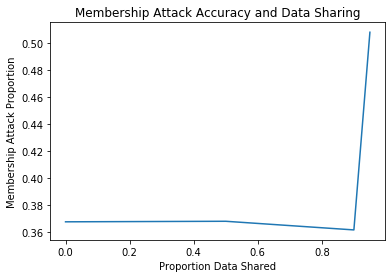

In [7]:
import matplotlib.pyplot as plt

plt.plot(proportions, accuracies)
plt.xlabel('Proportion Data Shared')
plt.ylabel('Membership Attack Proportion')
plt.title('Membership Attack Accuracy and Data Sharing')
plt.show()

In [9]:
accuracies

[0.36755, 0.36795, 0.36155, 0.5079]